# Analyse des notes du DNB

En **bon** prof de math, on commence par un petit cours sur les boites à moustaches! C'est un **super** outils pour visualiser la répartition des données entre elles.

On sépare les données en 4 groupes de même taille (25%). Un groupe dans une moustache, un dans une partie du corps, un dans l'autre partie du corps et le dernier dans l'autre moustache.

![Boite à moustache pour les newbies](https://lecluseo.scenari-community.org/1S/StatsDescriptives/res/moustache.png)

Je laisse ceux qui ne sont pas partis en courant à appuyer sur la *flèche du bas* ou *espace* pour avoir une boite à moustache un peu plus complexe et complete.

Pour les autres c'est *flèche de gauche*.

![Boite à moustache pour les newbies](http://lepcam.fr/wp-content/uploads/2016/04/boite-a-moustache-1024x403.png)

In [1]:
import pandas as pd
import numpy as np
from math import ceil
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint

In [2]:
gene = [str(i) for i in range(301, 305)] + [str(i) for i in range(309, 312)]
pro = [str(i) for i in range(305, 309)] + ["312"]
coeff = {
    "Français": 100,
    "HG": 50,
    "Maths": 100,
    "SVT": 25,
    "Physique": 25,
    "Techno": 25
}
matieres = list(coeff.keys())
norm_matieres = ["_"+m for m in matieres]

In [3]:
def orderedDict2df(sheets):
    dfs = []
    for tribe, df in sheets.items():
        df['classe'] = tribe
        dfs.append(df)
    return pd.concat(dfs)

# DNB Général


Ici juqu'au contraire, on ne parlera que des classes qui ont passé le DNB générale.

In [4]:
gene

['301', '302', '303', '304', '309', '310', '311']

In [5]:
sheets_gene = pd.read_excel("./DNB blanc 1.xls",
                            sheetname=gene,
                            skiprows=[0],
                            parse_cols="B,C,E,G,I,K,M",
                           )


In [6]:
df = orderedDict2df(sheets_gene)

In [7]:
#df.head()

In [8]:
df.columns = ["Nom", "Français", "HG", "Maths", "SVT", "Physique", "Techno", "Classe"]


In [9]:
for m, coef in coeff.items():
    df[m] = pd.to_numeric(df[m], errors='coerce')
    df["_"+m] = df[m]/coef
#df.head()

In [10]:
df = df = df.assign(
    total = df[matieres].sum(1),
    maximum = 325
)
df = df.assign(
    normalisee = df["total"]/df["maximum"]
)

Les absents ont toujours tord. On les sort de toute l'analyse qui suiva.


In [11]:
absents = df[df.isnull().any(1)]
absents[["Classe", "Nom"]+matieres]

Classe                            Nom  Français    HG  Maths  SVT  \
20    302               INOUSSA Anchoura      36.5  12.0    NaN  NaN   
6     303                 ATTOUMANI Amin       NaN   NaN    NaN  NaN   
9     304              M'MADI Abdourahim       NaN   NaN    NaN  NaN   
26    309        YOUSSOUFA Elina  (ULIS)       NaN   9.0   19.0  8.0   
6     310                 BACAR Abdallah       NaN   NaN    NaN  NaN   
9     310                 CHARKANE Farsa       NaN   NaN    NaN  NaN   
5     311                  ASSANE Kassim       NaN   NaN    NaN  NaN   
8     311          BEN SOIGHIR Soirianti       NaN   NaN    NaN  NaN   
9     311  BEN SOIGHIS AHAMADA Soirianti       NaN   NaN    NaN  NaN   
12    311               DJAANFARI Haïria       NaN   NaN    NaN  NaN   

    Physique  Techno  
20       NaN     NaN  
6        NaN     NaN  
9        NaN     NaN  
26       4.5    15.5  
6        NaN     NaN  
9        NaN     NaN  
5        NaN     NaN  
8        NaN     NaN  
9        NaN     NaN  
12       NaN     NaN

In [12]:
df = df[~df.isnull().any(1)]

## Répartition des notes.

Le DNB blanc était noté sur **325**.

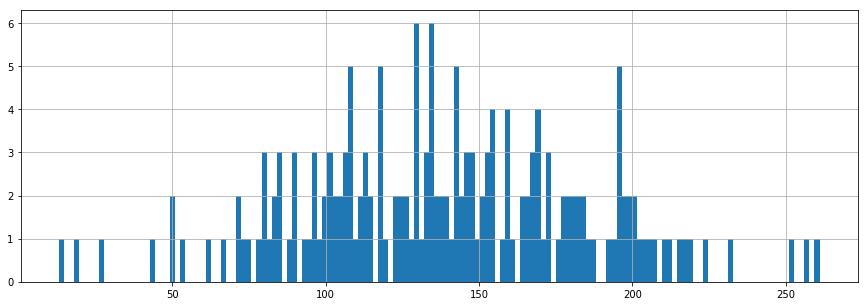

In [13]:
df["total"].hist(bins=150, figsize=(15, 5))

## Quelques statistiques!

Pour les non anglophones *mean* signifie *moyenne*, *std* (standart deviation) signifie *écart type*

Barèmes:
Français 100   HG 50   Math 100   SVT 25   Physique Chimie 25   Techno 25

In [14]:
round(df[matieres].describe(), 2)

Français      HG   Maths     SVT  Physique  Techno
count    178.00  178.00  178.00  178.00    178.00  178.00
mean      45.53   22.56   34.69   12.77     10.56   12.69
std       15.83    9.13   17.26    5.07      4.91    5.02
min        2.00    0.00    1.00    2.00      2.00    2.50
25%       37.50   15.25   23.00    9.12      6.00    8.50
50%       47.00   23.00   30.00   12.00     10.00   12.50
75%       55.38   28.75   42.75   16.00     14.00   16.50
max       88.00   43.00   90.00   25.00     24.00   23.50

## Répartition des notes par matières

Vous allez enfin retrouver les boites à moustaches!

*Les notes ont été normalisées pour pouvoir comparer les épreuves*

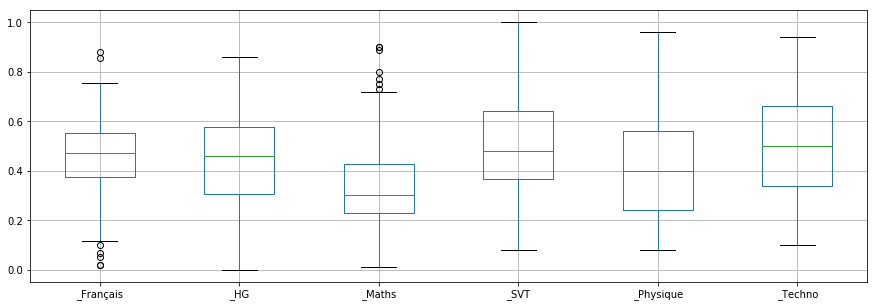

In [15]:
df[norm_matieres].boxplot(figsize=(15,5))

Les plus motivés pourront faire *flèche du bas* pour voir pleins de beaux graphiques qui ne disent pas grand chose (mais j'aime qu'on me fasse mentir).

### Y a-t-il un lien entre la réussite dans une matière et dans une autre?

Dans les nuages de points, chaque point correspond à une élèves.

On compage ses notes dans deux matières à chaque fois. L'idée est de voir si la réussite dans une matière est liée à la réussite dans une autre (elles sont **corrélées**) ou si au contraire, il n'y a pas de lien. Elles sont fortement corrélées quand les points sont regroupés. Si les points sont éclatés, la réussite dans une matière ne semble pas de rapport avec la réussite dans une autre.

Les graphiques du milieu montre la répartition de toutes les notes dans chaque matière.

In [16]:
from pandas.plotting import scatter_matrix

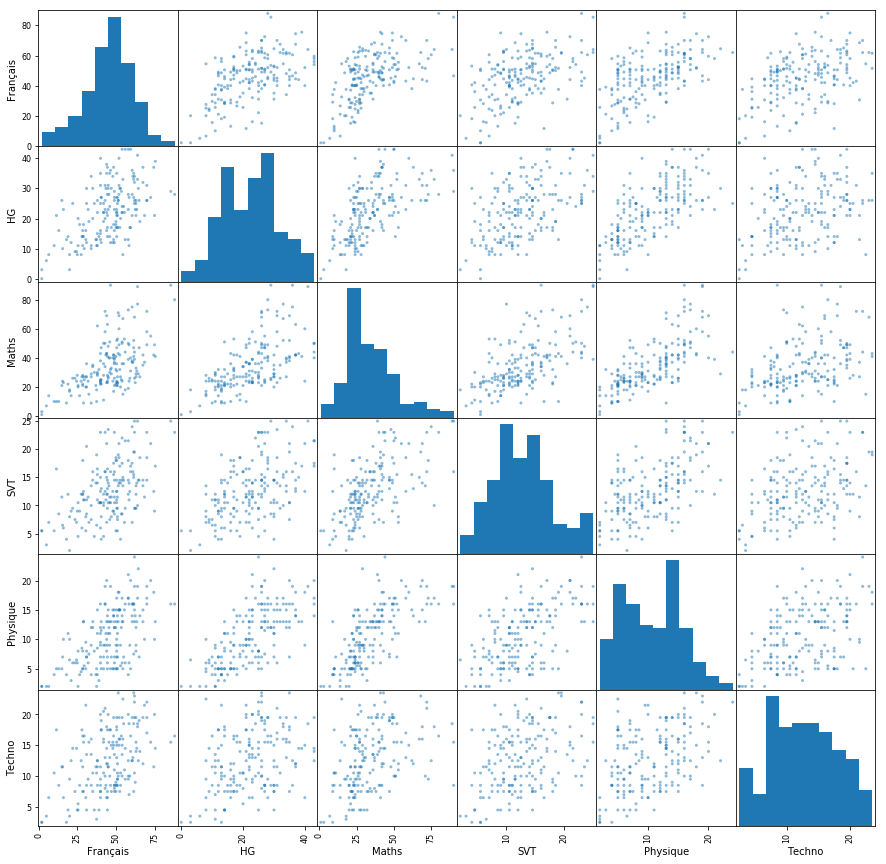

In [17]:
ax = scatter_matrix(df[matieres],
                    alpha=0.5,
                    figsize=(15, 15),
                    #diagonal='kde',
                   )

 Une autre version mais chaque couleur correspond à une classe.


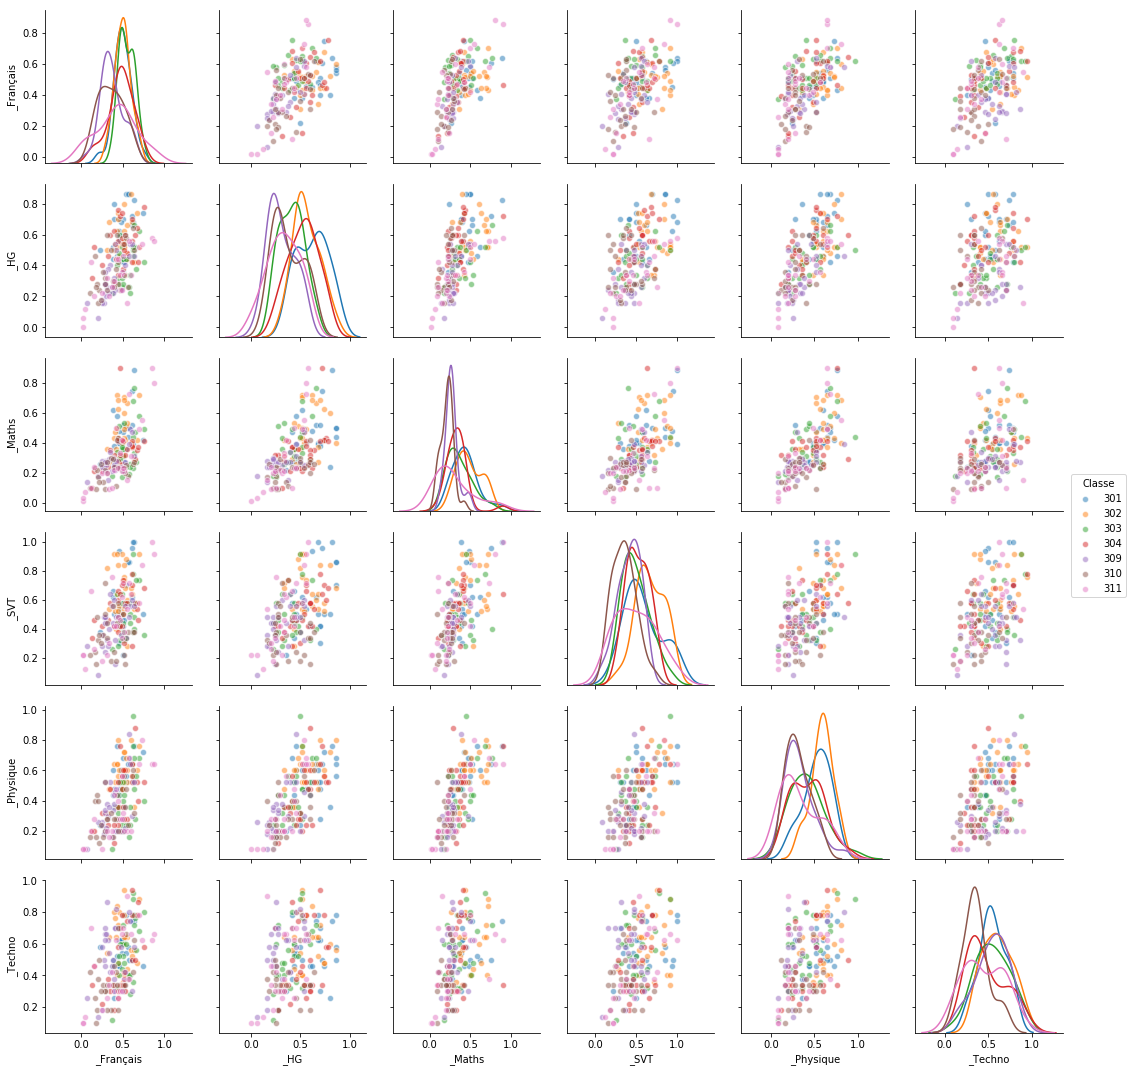

In [18]:
fig = sns.pairplot(df,
             vars=norm_matieres,
             hue="Classe",
             diag_kind="kde",
             plot_kws={'alpha':0.5,},
            )


# Comparaison des classes entre elles

Parce que chaque prof principale aime que sa classe soit la meilleure!

Mais rappelez vous, la comparaison des classes entre elle n'a pas beaucoup d'interet pour juger les élèves. Chaque classe n'a pas été corrigée par le même correcteur et on sait tous à quel point les autres profs sont pas sympas avec nos classes!

![C'est moi qui ait la meilleur classe](http://m.memegen.com/bceff1.jpg)

## Score total

In [19]:
bp_data = df[["total", "Classe"]].set_index("Classe", append=True).unstack(1)
bp_data.columns = bp_data.columns.droplevel()

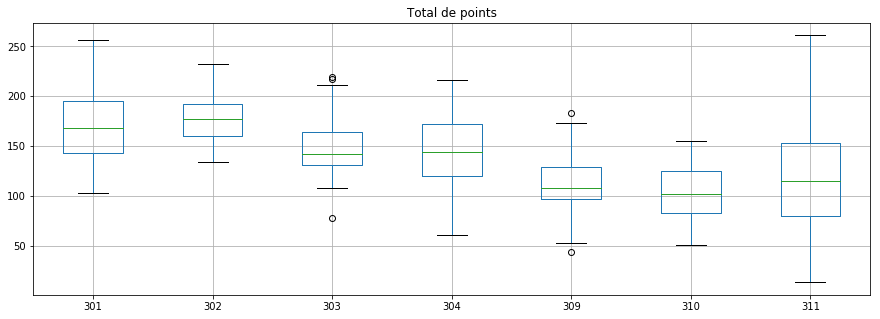

In [20]:
bp_data.plot(title="Total de points",
            kind="box",
             grid=True,
            figsize=(15,5))

In [21]:
df[["total", "Classe"]].set_index("Classe", append=True).unstack(1).columns.droplevel()

Index(['301', '302', '303', '304', '309', '310', '311'], dtype='object', name='Classe')

## Français

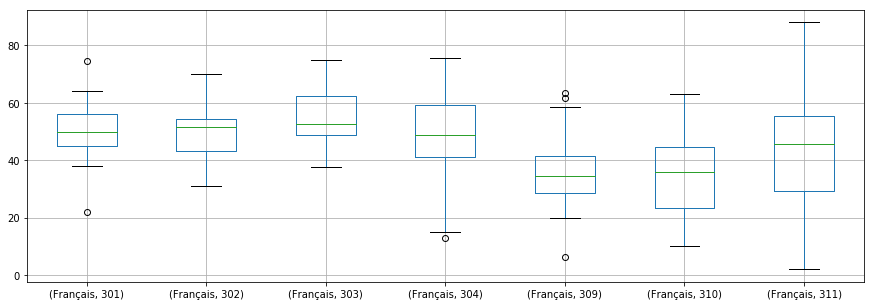

In [22]:
df[["Français", "Classe"]].set_index("Classe", append=True).unstack(1).boxplot(figsize=(15, 5))

## Histoire géo

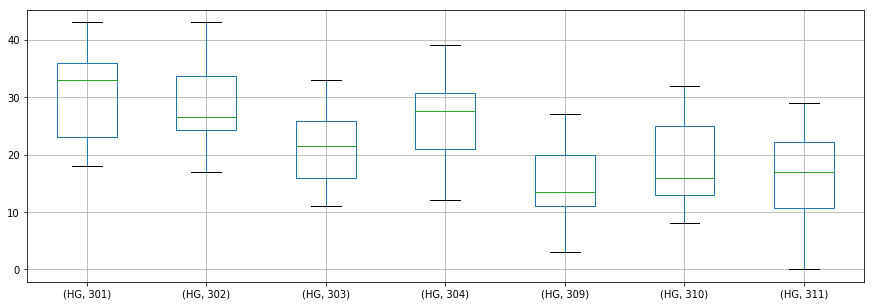

In [23]:
df[["HG", "Classe"]].set_index("Classe", append=True).unstack(1).boxplot(figsize=(15, 5))

## Les maths

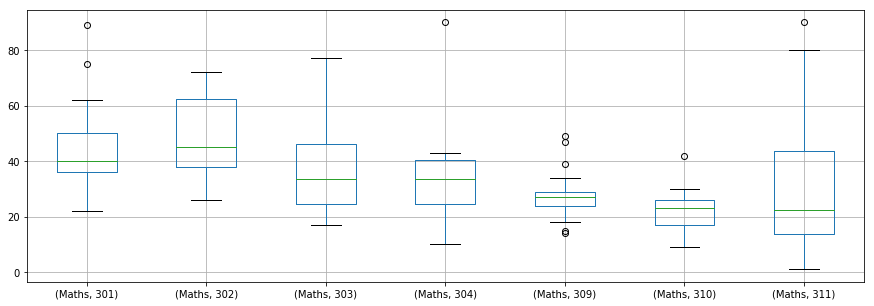

In [24]:
df[["Maths", "Classe"]].set_index("Classe", append=True).unstack(1).boxplot(figsize=(15, 5))

## SVT

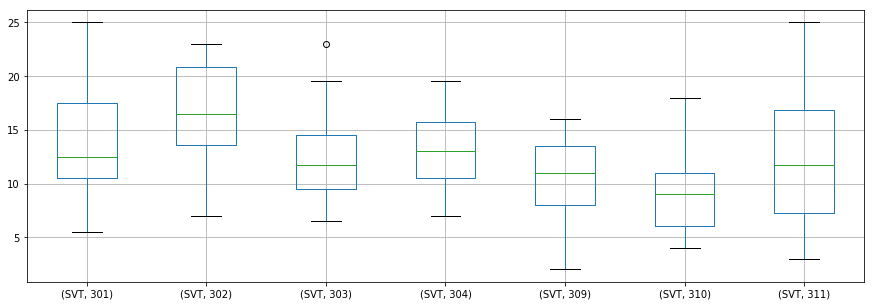

In [25]:
df[["SVT", "Classe"]].set_index("Classe", append=True).unstack(1).boxplot(figsize=(15, 5))

## Physique

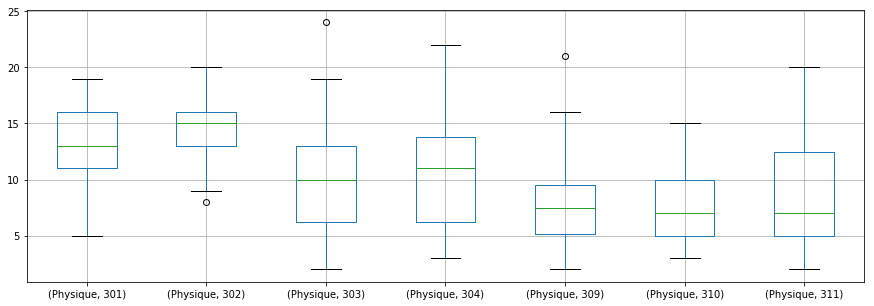

In [26]:
df[["Physique", "Classe"]].set_index("Classe", append=True).unstack(1).boxplot(figsize=(15, 5))

## Techno

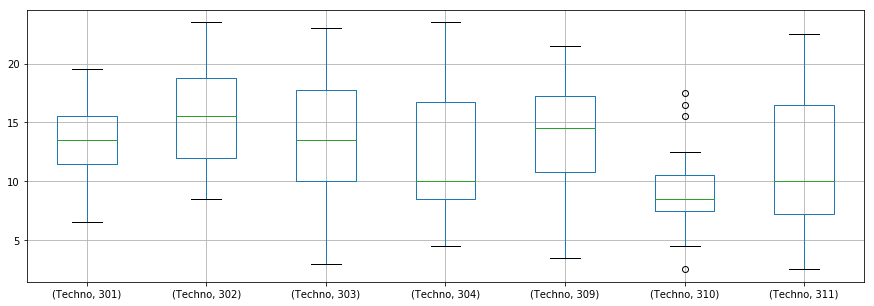

In [27]:
df[["Techno", "Classe"]].set_index("Classe", append=True).unstack(1).boxplot(figsize=(15, 5))

# DNB pro

On ne parle plus que des DNB pro maintenant

In [49]:
pro

['305', '306', '307', '308', '312']

In [28]:
sheets_pro = pd.read_excel("./DNB blanc 1.xls",
                           sheetname=pro,
                            skiprows=[0],
                            parse_cols="B,C,E,G,I,K,M",
                          )

df = orderedDict2df(sheets_pro)

In [29]:
#df.head()

In [30]:
df.columns = ["Nom", "Français", "HG", "Maths", "SVT", "Physique", "Techno", "Classe"]

In [31]:
for m, coef in coeff.items():
    df[m] = pd.to_numeric(df[m], errors='coerce')
    df["_"+m] = df[m]/coef
#df.head()

In [32]:
df = df = df.assign(
    total = df[matieres].sum(1),
    maximum = 325
)
df = df.assign(
    normalisee = df["total"]/df["maximum"]
)

Elèves absent à au moins une epreuve

In [33]:
absents = df[df.isnull().any(1)]
absents[["Nom", "Classe"]+matieres]

Nom Classe  Français  HG  Maths  SVT  Physique  Techno
5       ALI CHIONI Azihar    305       NaN NaN    NaN  NaN       NaN     NaN
19        YOUSSOUF Radika    305       NaN NaN    NaN  NaN       NaN     NaN
10  IBRAHIM Izaki (UPE2A)    306       NaN NaN   12.0  5.5       NaN     2.0
3    ALI MROIVILI Rasmine    307       NaN NaN    NaN  NaN       NaN     NaN
5     AN-YALDINE Mourtaza    307       NaN NaN    NaN  NaN       NaN     NaN
0         ABDOU Mounibati    308       NaN NaN    NaN  NaN       NaN     NaN
1           AHAMED Halima    308       NaN NaN    NaN  NaN       NaN     NaN
6         ANDILI Hafidhou    308       NaN NaN    NaN  NaN       NaN     NaN
21          MOUSTOIFA Edé    308       NaN NaN    NaN  NaN       NaN     NaN
22         MROIVILI Abdou    308       NaN NaN    NaN  NaN       NaN     NaN
23           MZE El Anziz    308       NaN NaN    NaN  NaN       NaN     NaN
24     RABEHAMINA Jessica    308       NaN NaN    NaN  NaN       NaN     NaN

In [34]:
df = df[~df.isnull().any(1)]

## Répartition des notes

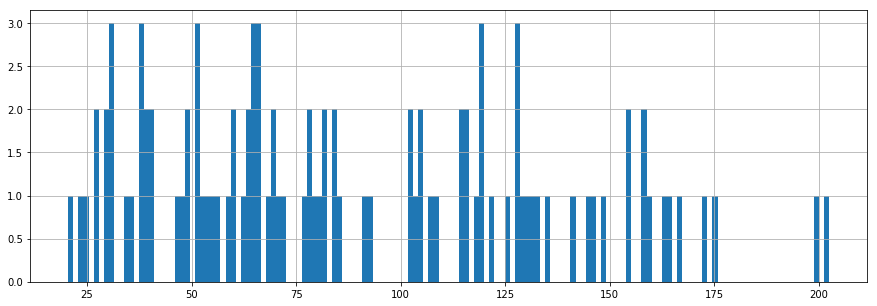

In [35]:
df["total"].hist(bins=150, figsize=(15, 5))

## Statistiques par matières et le total

In [36]:
round(df[matieres+["total"]].describe(), 2)

Français      HG   Maths     SVT  Physique  Techno   total
count    100.00  100.00  100.00  100.00    100.00  100.00  100.00
mean      25.92   15.76   24.30    9.18      6.28    7.14   88.58
std       18.62    7.57   14.35    5.02      3.98    3.87   45.41
min        1.00    2.00    5.00    2.50      2.00    2.00   20.50
25%        9.50    9.00   14.38    4.50      3.00    4.00   51.88
50%       21.50   15.00   21.00    9.00      5.00    6.75   78.75
75%       41.50   21.00   29.62   13.00      8.25    9.00  122.38
max       68.00   34.00   81.00   20.00     21.00   20.50  202.50

## Données par matières

On a rapporté les notes sur 1 pour pouvoir comparer les matières entre elles.

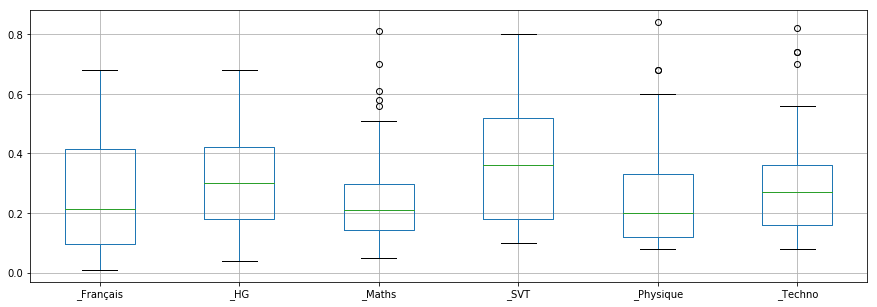

In [37]:
df[norm_matieres].boxplot(figsize=(15,5))

### Y a-t-il un lien entre la réussite dans une matière et dans une autre?

In [38]:
from pandas.plotting import scatter_matrix

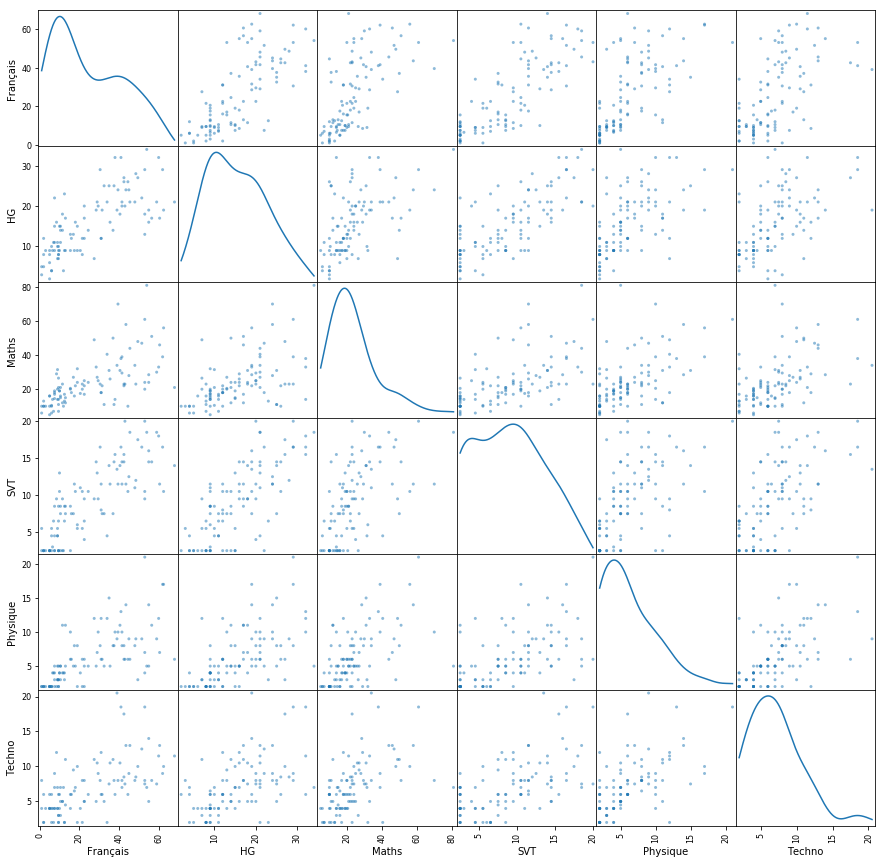

In [39]:
ax = scatter_matrix(df[matieres],
                    alpha=0.5,
                    figsize=(15, 15),
                    diagonal='kde')

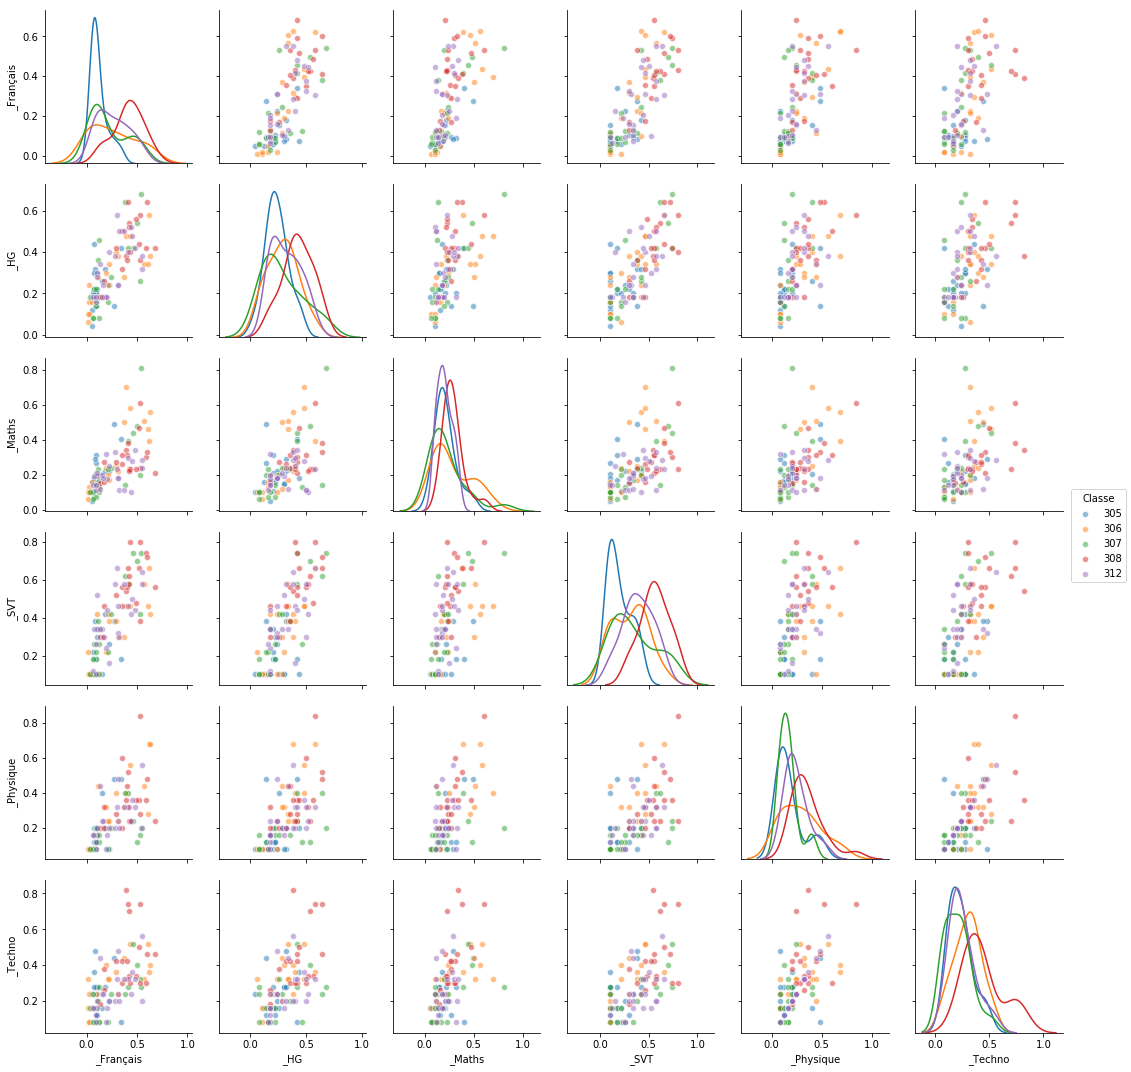

In [40]:
fig = sns.pairplot(df,
             vars=norm_matieres,
             hue="Classe",
             diag_kind="kde",
             plot_kws={'alpha':0.5,},
            )


## Le total des points

In [41]:
bp_data = df[["total", "Classe"]].set_index("Classe", append=True).unstack(1)
bp_data.columns = bp_data.columns.droplevel()

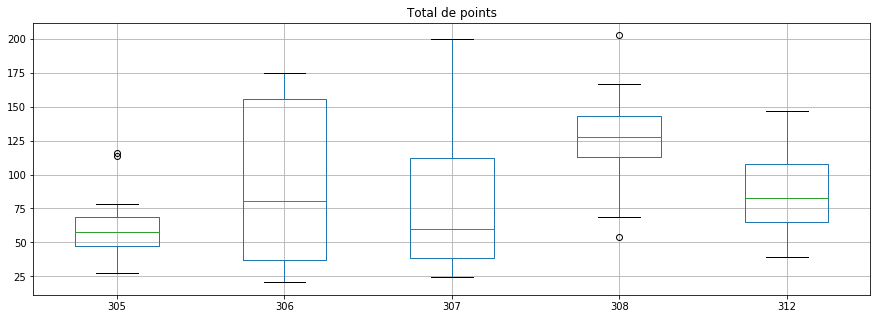

In [42]:
bp_data.plot(title="Total de points",
            kind="box",
             grid=True,
            figsize=(15,5))

## Français

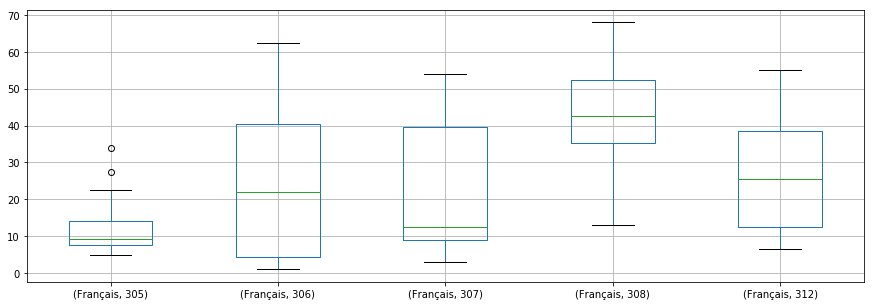

In [43]:
df[["Français", "Classe"]].set_index("Classe", append=True).unstack(1).boxplot(figsize=(15, 5))

## Histoire géo

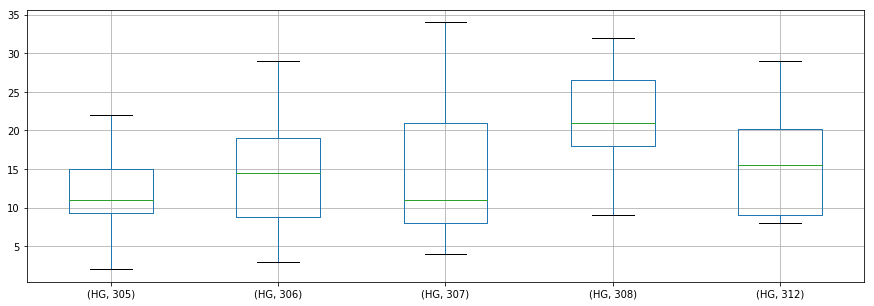

In [44]:
df[["HG", "Classe"]].set_index("Classe", append=True).unstack(1).boxplot(figsize=(15, 5))

## Les maths

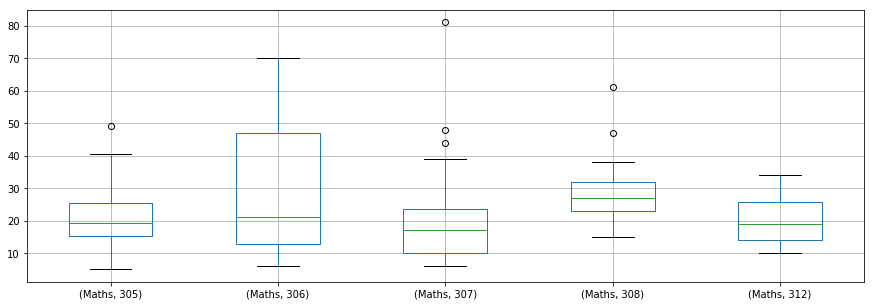

In [45]:
df[["Maths", "Classe"]].set_index("Classe", append=True).unstack(1).boxplot(figsize=(15, 5))

## SVT

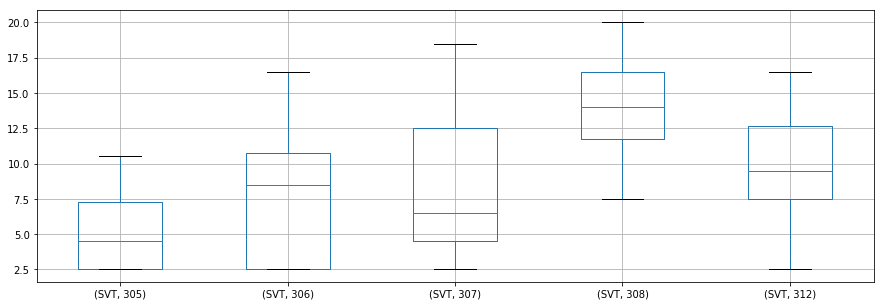

In [46]:
df[["SVT", "Classe"]].set_index("Classe", append=True).unstack(1).boxplot(figsize=(15, 5))

## Physique

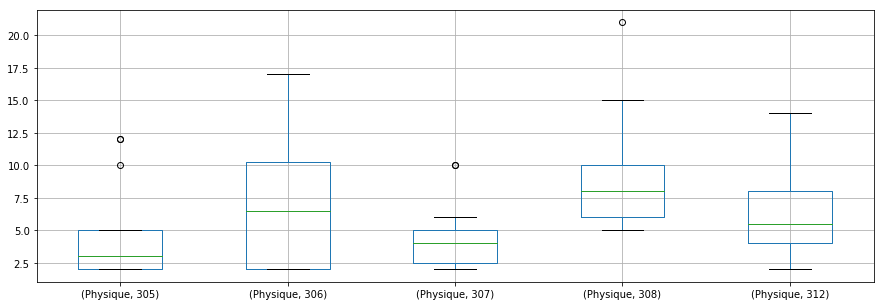

In [47]:
df[["Physique", "Classe"]].set_index("Classe", append=True).unstack(1).boxplot(figsize=(15, 5))

## Techno

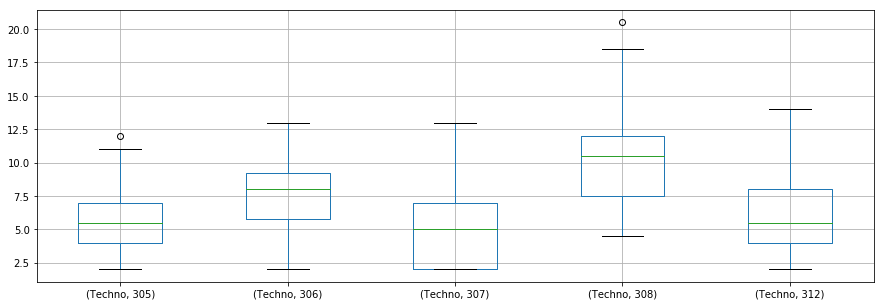

In [48]:
df[["Techno", "Classe"]].set_index("Classe", append=True).unstack(1).boxplot(figsize=(15, 5))